1 Active data exploration

As the first step, add more features and explore the data.

1. Load the data. It is included in sklearn.datasets and you can find many copies on the internet too.
Make sure you know the coding of all variables. In particular, you should be aware if a variable is
categorical or numeric. Explain the coding scheme if it's not obvious.
2. Add some (10 or so) engineered features (synthetic features) to the data. As in the previous problem
set, you may use various mathematical operations on a single or multiple features to create new ones.
3. Add another set (10 or so) bogus features, variables that have no relationship whatsoever to Boston
housing market. You may just pick random numbers, or numbers from irrelevant sources, such as
population of Chinese cities or baseball scores of yesteryear. Give these features distinct names
(such as B1-B10) so you (and the reader) can easily recognize these later. You should have about
35 features in your data now.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy
from scipy import stats
from scipy.stats.stats import pearsonr   
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  precision_score, recall_score
from random import randint


In [2]:
#Load the data. It is included in sklearn.datasets and you can find many copies on the internet too.
#Make sure you know the coding of all variables. In particular, you should be aware if a variable is categorical or numeric. Explain the coding scheme if it's not obvious.

from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data.DESCR)
#print(iris_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
df_bos = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)
df_bos_target = pd.DataFrame(boston_data.target, columns=['target'])
df_bos['target']=df_bos_target['target']

#Ensure that the created Data frame has all the necessary columns
print(boston_data.feature_names)
print(list(df_bos))
print("\n\n",df_bos.head(4))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target']


       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  


Had to add target variable separately. All the variables are explained well in the data documentation. Target variable is continuous

1.2 Add some (10 or so) engineered features (synthetic features) to the data. 

As in the previous problem set, you may use various mathematical operations on a single or multiple features to create new ones.

In [5]:
#Creating engineered features
#1 Dummy variable with TAX>500 =1 else 0
df_bos['tax_filter']=(df_bos['TAX']>500)*1

#2 Create log of NOX, to convert into Normal distribution
df_bos['Nox_log']=df_bos["NOX"].apply(np.log)
#print(df_bos.head(5))
#plt.hist(df_bos['Nox_log'])

#3 Dummy variable with Age>80 = 1 else 0
df_bos['Age_filter']=(df_bos['AGE']>80)*1
#plt.hist(df_bos['Age_filter'])

#4 Create log of CRIM variable into Normal distribution
#plt.hist(df_bos['CRIM'])
df_bos['Crim_log']=df_bos["CRIM"].apply(np.log)
#plt.hist(df_bos['Crim_log'])

#5 Create dummy of Rad>10
#plt.hist(df_bos['RAD'])
df_bos['Rad_filter']=(df_bos['RAD']>10)*1
#plt.hist(df_bos['Rad_filter'])

#6 Sqrt of Indus
#plt.hist(df_bos['INDUS'])
df_bos['Indus_sqrt']=df_bos['INDUS']**1/2
#plt.hist(df_bos['Indus_sqrt'])

#7 Create dummy of ZN
#plt.hist(df_bos['ZN'])
df_bos['ZN_filter']=(df_bos['ZN']>0)*1
#plt.hist(df_bos['ZN_filter'])

#8 Log of distance
#plt.hist(df_bos['DIS'])
df_bos['Dis_log']=df_bos["DIS"].apply(np.log)
#plt.hist(df_bos['Dis_log'])

#9 Square of ptratio
#plt.hist(df_bos['PTRATIO'])
df_bos['pt_ratio_x']=df_bos["PTRATIO"]**2
#plt.hist(df_bos['pt_ratio_x'])

#10 Log of Lstat
#plt.hist(df_bos['LSTAT'])
df_bos['Lstat_x']=df_bos["LSTAT"].apply(np.log)
#plt.hist(df_bos['Lstat_x'])


1.3 Add another set (10 or so) bogus features, variables that have no relationship whatsoever to Boston
housing market. You may just pick random numbers, or numbers from irrelevant sources, such as
population of Chinese cities or baseball scores of yesteryear. Give these features distinct names
(such as B1-B10) so you (and the reader) can easily recognize these later. You should have about
35 features in your data now

In [7]:
#Adding bogus features
df_bos['B1'] = np.random.normal(size=506)
df_bos['B2'] = np.random.normal(size=506)
df_bos['B3'] = np.random.normal(size=506)
df_bos['B4'] = np.random.normal(size=506)
df_bos['B5'] = np.random.normal(size=506)
df_bos['B6'] = np.random.normal(size=506)
df_bos['B7'] = np.random.normal(size=506)
df_bos['B8'] = np.random.normal(size=506)
df_bos['B9'] = np.random.normal(size=506)
df_bos['B10'] = np.random.normal(size=506)
df_bos['B11'] = np.random.normal(size=506)

print("Number of variables in the dataset: ",len(list(df_bos)))

Number of variables in the dataset:  35


1.4 Create a summary table where you show means, ranges, and number of missings for each variable.
In addition, add correlation between the price and each variable. You may add more statistics you
consider useful to this table.

In [8]:
z=list(df_bos)
y=pd.DataFrame({'Mean':df_bos[z].mean(),
                'Missing':df_bos[z].isnull().sum(),
                'Range-Min':df_bos[z].min(),
                'Range-Max':df_bos[z].max(),
               })
y['corr1']=0
for i in range(0,len(z)):
    x1=pearsonr(df_bos['target'],df_bos[z[i]])
    y.ix[i,'corr1']= x1[0]

print(y)


                  Mean  Missing   Range-Max   Range-Min     corr1
CRIM          3.593761        0   88.976200    0.006320 -0.385832
ZN           11.363636        0  100.000000    0.000000  0.360445
INDUS        11.136779        0   27.740000    0.460000 -0.483725
CHAS          0.069170        0    1.000000    0.000000  0.175260
NOX           0.554695        0    0.871000    0.385000 -0.427321
RM            6.284634        0    8.780000    3.561000  0.695360
AGE          68.574901        0  100.000000    2.900000 -0.376955
DIS           3.795043        0   12.126500    1.129600  0.249929
RAD           9.549407        0   24.000000    1.000000 -0.381626
TAX         408.237154        0  711.000000  187.000000 -0.468536
PTRATIO      18.455534        0   22.000000   12.600000 -0.507787
B           356.674032        0  396.900000    0.320000  0.333461
LSTAT        12.653063        0   37.970000    1.730000 -0.737663
target       22.532806        0   50.000000    5.000000  1.000000
tax_filter

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


1.5 Graphical exploration. Make a number of scatterplots where you explore the relationship between
features and the value. Include a few features you consider relevant and a few you consider irrelevant
here.

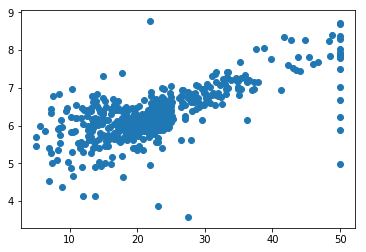

In [9]:
#Relevant variable 1
plt.scatter(df_bos['target'],df_bos['RM'])

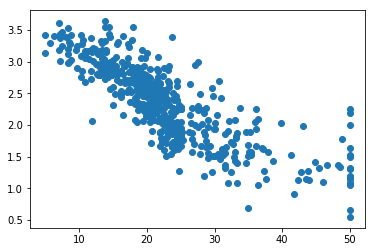

In [10]:
#Relevant variable 2
plt.scatter(df_bos['target'],df_bos['Lstat_x'])

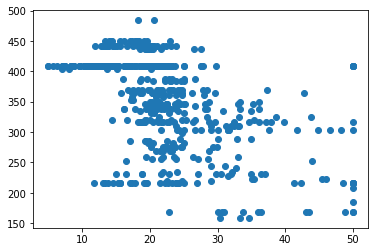

In [12]:
#Relevant variable 3
plt.scatter(df_bos['target'],df_bos['pt_ratio_x'])

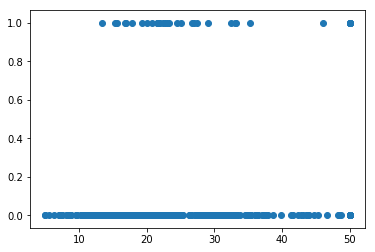

In [13]:
#Relevant variable 4
plt.scatter(df_bos['target'],df_bos['CHAS'])

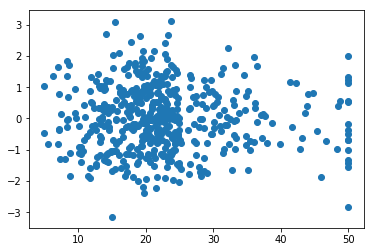

In [14]:
#Irrelevant variable 1
plt.scatter(df_bos['target'],df_bos['B1'])

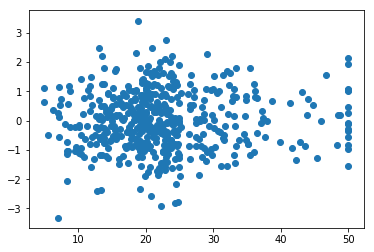

In [15]:
#Irrelevant variable 2
plt.scatter(df_bos['target'],df_bos['B2'])

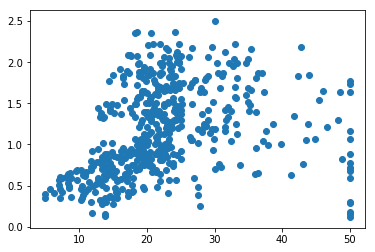

In [16]:
#Irrelevant variable 3
plt.scatter(df_bos['target'],df_bos['Dis_log'])

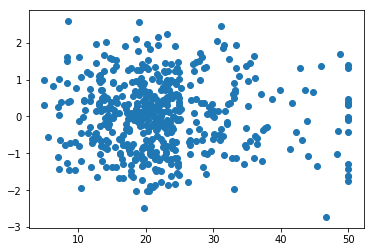

In [17]:
#Irrelevant variable 4
plt.scatter(df_bos['target'],df_bos['B4'])

In [20]:
#Create X variables as a list

#lm = LinearRegression()
#model = lm.fit(df_bos[xcol], df_bos['target'])

#scores = cross_val_score(model, df_bos[xcol], df_bos['target'], cv=6)
#print ('Cross-validated scores:', scores)

#predictions = cross_val_predict(model, df_bos[xcol], df_bos['target'], cv=6)
#plt.scatter(df_bos['target'], predictions)

2 Warm-up: a few simple models
Your first real task, although just a warm-up, is to run a few linear models and evaluate their performance
through cross-validation. You should code the loss function (mean squared errors) manually, and use this
hand-made function throughout the rest of the problemset. You can use either a canned CV function from
sklearn, or you can code your own.

2.1 Loss function

Write a function that calculates the mean quadratic loss
(1/N)*(y − Xβ)'*(y − Xβ) where N is the number of observations.
1. Write this function. The function should take three inputs: 

a) the estimated model (or just the estimated parameters β); 

b) the test data X; 

c)the test labels y. You may add other inputs if you consider it useful, for instance controls for print verbosity.

Ensure that the function is available through rest of the problem set. Also, please use this function for all following cross-validation exercises. If you are using canned cross-validation code, please ensure that the code uses your actual loss function!

In [26]:
xcol=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',  'tax_filter', 'Nox_log', 'Age_filter', 'Crim_log', 'Rad_filter', 'Indus_sqrt', 'ZN_filter', 'Dis_log', 'pt_ratio_x', 'Lstat_x', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']


k=10
indices = np.arange(len(df_bos))
np.random.shuffle(indices)

loss = np.empty(k)

def lossf (mod,X1,y1):
    yhat1 = mod.predict(X1)
    n=len(X1)
    loss1=((yhat1-y1)**2)
    loss_f=1/n*sum(loss1)
    return(loss_f)

for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = df_bos.iloc[itest]
    trainDat = df_bos.iloc[itrain]
    X=trainDat[xcol]
    y=trainDat['target']
    lm = LinearRegression()
    model = lm.fit(df_bos[xcol], df_bos['target'])
    X1=testDat[xcol]
    y1=testDat['target']
    yhat1 = model.predict(X1)
    loss[i]=lossf(model,testDat[xcol],testDat['target'])
    #rmse1[i] = np.sqrt(np.mean((yhat1 - y1)**2))
    #print(loss[i]) 
print("\nAverage loss:",np.mean(loss))





Average loss: 15.211749702943834



Average loss: 15.543379282246326


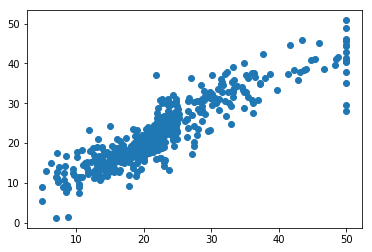

In [23]:
#Sample Model 2
#Selected few varaibles
xcol=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',  'tax_filter', 'Nox_log', 'Age_filter', 'Crim_log', 'Rad_filter', 'Indus_sqrt', 'ZN_filter', 'Dis_log', 'pt_ratio_x', 'Lstat_x']

k=10
indices = np.arange(len(df_bos))
np.random.shuffle(indices)
loss = np.empty(k)

for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = df_bos.iloc[itest]
    trainDat = df_bos.iloc[itrain]
    X=trainDat[xcol]
    y=trainDat['target']
    lm = LinearRegression()
    model = lm.fit(df_bos[xcol], df_bos['target'])
    X1=testDat[xcol]
    y1=testDat['target']
    yhat1 = model.predict(X1)
    loss[i]=lossf(model,testDat[xcol],testDat['target'])
    #print(loss[i]) 
print("\nAverage loss:",np.mean(loss))

yhat1 = model.predict(df_bos[xcol])
plt.scatter(df_bos['target'], yhat1)



Average loss: 19.811535436603727


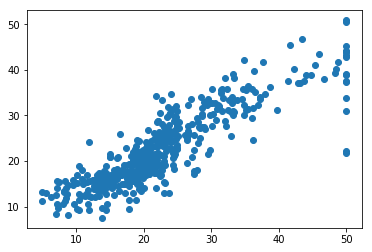

In [20]:
#Sample Model 3
xcol=[ 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO',  'LSTAT',  'tax_filter', 'Nox_log',  'Crim_log', 'Indus_sqrt',  'pt_ratio_x', 'Lstat_x']

k=10
indices = np.arange(len(df_bos))
np.random.shuffle(indices)
loss = np.empty(k)

for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = df_bos.iloc[itest]
    trainDat = df_bos.iloc[itrain]
    X=trainDat[xcol]
    y=trainDat['target']
    lm = LinearRegression()
    model = lm.fit(df_bos[xcol], df_bos['target'])
    X1=testDat[xcol]
    y1=testDat['target']
    yhat1 = model.predict(X1)
    loss[i]=lossf(model,testDat[xcol],testDat['target'])
    #print(loss[i]) 
print("\nAverage loss:",np.mean(loss))

yhat1 = model.predict(df_bos[xcol])
plt.scatter(df_bos['target'], yhat1)


Model with all variables performed well, when compared to Sample Model2(only with subset of variables)

2.2 A few simple regressions

Next, let's estimate and cross validate a few simple regressions.

1. Create a small model. It should include 1-2 variables you consider relevant, i.e. features you think
should be closely related to price.
2. 10-fold cross-validate this model to get the average MSE score (the value of your loss function).
3. Now build the next model with 10 features. Add more features you consider relevant but also those
you consider irrelevant. Compute 10-fold MSE for this model.
4. Finally, include all your features and compute MSE. We call this the full model below.
5. Compare the results. Which has the best performance?


Average loss: 24.735191927943905


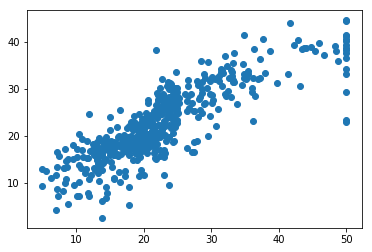

In [28]:
#Small model with 10 fold cross validation
xcol=[ 'RM', 'Lstat_x']

k=10
indices = np.arange(len(df_bos))
np.random.shuffle(indices)
loss = np.empty(k)

for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = df_bos.iloc[itest]
    trainDat = df_bos.iloc[itrain]
    X=trainDat[xcol]
    y=trainDat['target']
    lm = LinearRegression()
    model = lm.fit(df_bos[xcol], df_bos['target'])
    X1=testDat[xcol]
    y1=testDat['target']
    yhat1 = model.predict(X1)
    loss[i]=lossf(model,testDat[xcol],testDat['target'])
print("\nAverage loss:",np.mean(loss))

yhat1 = model.predict(df_bos[xcol])
plt.scatter(df_bos['target'], yhat1)



Average loss: 21.38217849460535


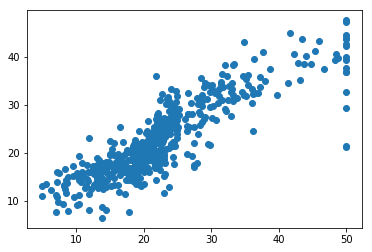

In [29]:
#Including relevant & irrelevant variables
xcol=['RM', 'TAX', 'PTRATIO',  'LSTAT',  'tax_filter', 'Nox_log', 'Lstat_x','B1','B2','B3']

k=10
indices = np.arange(len(df_bos))
np.random.shuffle(indices)
loss = np.empty(k)

for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = df_bos.iloc[itest]
    trainDat = df_bos.iloc[itrain]
    X=trainDat[xcol]
    y=trainDat['target']
    lm = LinearRegression()
    model = lm.fit(df_bos[xcol], df_bos['target'])
    X1=testDat[xcol]
    y1=testDat['target']
    yhat1 = model.predict(X1)
    loss[i]=lossf(model,testDat[xcol],testDat['target'])
    #print(loss[i]) 
print("\nAverage loss:",np.mean(loss))

yhat1 = model.predict(df_bos[xcol])
plt.scatter(df_bos['target'], yhat1)



Average loss: 15.193952235049684


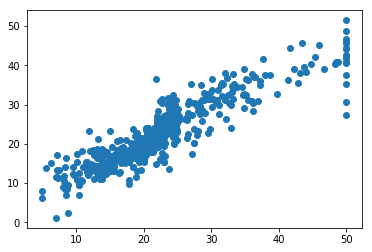

In [30]:
#Including all X variables
xcol=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',  'tax_filter', 'Nox_log', 'Age_filter', 'Crim_log', 'Rad_filter', 'Indus_sqrt', 'ZN_filter', 'Dis_log', 'pt_ratio_x', 'Lstat_x', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']

k=10
indices = np.arange(len(df_bos))
np.random.shuffle(indices)
loss = np.empty(k)

for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = df_bos.iloc[itest]
    trainDat = df_bos.iloc[itrain]
    X=trainDat[xcol]
    y=trainDat['target']
    lm = LinearRegression()
    model = lm.fit(df_bos[xcol], df_bos['target'])
    X1=testDat[xcol]
    y1=testDat['target']
    yhat1 = model.predict(X1)
    loss[i]=lossf(model,testDat[xcol],testDat['target'])
    #print(loss[i]) 
print("\nAverage loss:",np.mean(loss))

yhat1 = model.predict(df_bos[xcol])
plt.scatter(df_bos['target'], yhat1)


As we include more variables, the loss(MSE) reduces. So far the model with all variables performs best.

3 Find the best model

3.1 Can we evaluate all models?

How much time would it take to evaluate all possible models? Let's find it out.
1. How many different linear regression models can you build based on the features you have (including the ones you generated)?
2. Run a test: run the following loop a number of times so that the total execution time is reasonably long (at least 5 seconds) but not too long.

(a) choose a random number of different features

(b) estimate the model based on these features

(c) run 10-fold CV to get the MSE score for this model.

3. Based on the test timings, calculate how long time it would take to evaluate all the possible models.
Would it be possible to store all the resulting MSE-s in your computer's memory?

In [34]:
xcol=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',  'tax_filter', 'Nox_log', 'Age_filter', 'Crim_log', 'Rad_filter', 'Indus_sqrt', 'ZN_filter', 'Dis_log', 'pt_ratio_x', 'Lstat_x', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']

result=pd.DataFrame()
g=0
r=0
z=0

#Running it only for 5 variables for now:
for g in range(0,5):
    for r in range(0,len(xcol)):
        c=g+r+1
        if c>=len(xcol):
            r=len(xcol)
        xcol3=xcol[g:c]
        k=10
        indices = np.arange(len(df_bos))
        np.random.shuffle(indices)
        loss = np.empty(k)
        
        for i in range(k):
            itest = indices[i::k]
            itrain = list(set(indices).difference(itest))
            testDat = df_bos.iloc[itest]
            trainDat = df_bos.iloc[itrain]
            X=trainDat[xcol3]
            y=trainDat['target']
            lm = LinearRegression()
            model = lm.fit(trainDat[xcol3], trainDat['target'])
            X1=testDat[xcol3]
            y1=testDat['target']
            yhat1 = model.predict(X1)
            loss[i]=lossf(model,testDat[xcol3],testDat['target'])
        z=z+1
        result.at[z,0]=" ".join(str(xr) for xr in xcol3)
        result.at[z,1]=np.mean(loss)
        

print(result)



                                                     0          1
1                                                 CRIM  72.715264
2                                              CRIM ZN  65.703652
3                                        CRIM ZN INDUS  60.428293
4                                   CRIM ZN INDUS CHAS  59.035671
5                               CRIM ZN INDUS CHAS NOX  58.443850
6                            CRIM ZN INDUS CHAS NOX RM  36.729525
7                        CRIM ZN INDUS CHAS NOX RM AGE  36.703979
8                    CRIM ZN INDUS CHAS NOX RM AGE DIS  33.207760
9                CRIM ZN INDUS CHAS NOX RM AGE DIS RAD  33.291712
10           CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX  31.815612
11   CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO  29.709756
12   CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRA...  28.598561
13   CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRA...  24.063838
14   CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRA...  24.169056
15   CRIM 

Plan is to add 1 variable at each step, and set different starting point. 
Takes 18 seconds to run for 5 variables. Considering we have around 34 variables, it will take minimum 2 mins to run the models(If we take all variables in combination of variable X followed by all other varaibles). In this combination, once I start dropping the variables from the list, it will take more than 28 mins to run all combinations

3.2 Forward selection

Next, let's implement the forward selection procedure to determine wich is the best model. Use 10-fold CV again to evaluate your models.
1. James et al. (2015, section 6.1), in particular page 207.
2. Create a series of 1-feature models and pick the best one by 10-fold CV. Note: always include the constant.
3. Pick the feature with the lowest loss. This is your 1-feature model.
4. Repeat the procedure with more features until all features are included.
5. Pick the best model using Cp, AIC, BIC or adjusted R

This is your forward-selection model.

In [41]:
xcol=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',  'tax_filter', 'Nox_log', 'Age_filter', 'Crim_log', 'Rad_filter', 'Indus_sqrt', 'ZN_filter', 'Dis_log', 'pt_ratio_x', 'Lstat_x', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']
xcol_d=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',  'tax_filter', 'Nox_log', 'Age_filter', 'Crim_log', 'Rad_filter', 'Indus_sqrt', 'ZN_filter', 'Dis_log', 'pt_ratio_x', 'Lstat_x', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']
import statsmodels.api as sm
import operator
from sklearn.metrics import r2_score

pd.set_option('display.float_format', lambda x: '%.3f' % x)

result1=pd.DataFrame()
result3=pd.DataFrame()
result3 = pd.DataFrame(columns=['Var', 'Loss','R square'])
result_f=pd.DataFrame()
g=0
r=0
z=0
rsquared = np.empty(k)
xcol_f=[]
#result3.columns = ['Var', 'Loss']

def lossf (mod,X1,y1):
    yhat1 = (mod.predict(X1))
    n=len(X1)
    loss1 = list(map(operator.sub,yhat1,y1))
    loss2=[xr**2 for xr in loss1]
    loss_f=1/n*sum(loss2)
    return(loss_f)

z=0
for h in range(0,len(xcol)):
    xcol_d=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',  'tax_filter', 'Nox_log', 'Age_filter', 'Crim_log', 'Rad_filter', 'Indus_sqrt', 'ZN_filter', 'Dis_log', 'pt_ratio_x', 'Lstat_x', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']
    if len (xcol_f)>0:
        xcol_d=[d for d in xcol_d if d not in xcol_f]
    g=0
    for g in range(0,len(xcol_d)):
        xcol3[:]=[]
        xcol3=list(xcol_f)
        xcol3.append(xcol_d[g])
        #print(xcol3)
        k=10
        indices = np.arange(len(df_bos))
        np.random.shuffle(indices)
        loss = np.empty(k)
        for i in range(k):
            itest = indices[i::k]
            itrain = list(set(indices).difference(itest))
            testDat = df_bos.iloc[itest]
            trainDat = df_bos.iloc[itrain]
            X=trainDat[xcol3]
            X = sm.add_constant(X)
            y=trainDat['target']
            lm = LinearRegression()
            model = lm.fit(X, y)
            X1 = testDat[xcol3]
            X1 = sm.add_constant(X1)
            loss[i]=lossf(model,X1,testDat['target'])
            yhat1 = (model.predict(X1))
            rsquared[i]=r2_score(testDat['target'],yhat1)
        z=z+1
        a1=" ".join(str(xr) for xr in xcol3)
        b1=np.mean(loss)
        d1=np.mean(rsquared)
        c1=[{'Var':a1,'Loss': b1,'R square' :d1 }]
        result3=result3.append(pd.DataFrame(c1), ignore_index=True)
    result2=result3[result3['Loss']==result3['Loss'].min()]
    xcol_f = result2.iloc[0,2].split()
    #print(result2)
    
    a1=" ".join(str(xr) for xr in xcol_f)
    b1=result2.iloc[0,0]
    d1=result2.iloc[0,1]
    c1=[{'Var':a1,'Loss': b1,'R square' :d1}]
    result_f=result_f.append(pd.DataFrame(c1), ignore_index=True)

print("Model combinations:\n",result3)    
print("Result final:\n",result_f)    


Model combinations:
       Loss  R square                                                Var
0   73.758     0.098                                               CRIM
1   74.043     0.109                                                 ZN
2   65.022     0.229                                              INDUS
3   82.425     0.006                                               CHAS
4   69.520     0.177                                                NOX
5   44.482     0.438                                                 RM
6   72.907     0.129                                                AGE
7   79.887     0.036                                                DIS
8   72.460     0.142                                                RAD
9   67.112     0.162                                                TAX
10  63.711     0.219                                            PTRATIO
11  75.668     0.069                                                  B
12  38.740     0.542                       

The first table is the iterative table, which is used to find the variable with lowest loss, and then model is run again with selected variables to find the combination with lowest loss and so on.

Result final table is the end result after forward selection process. Though all the variables have been added, reduction in Loss is not that great after 10 variables.

In [44]:
#Best model based on R square:
print("Model:\n",result_f.iloc[8,2])
print("R square:\n",result_f.iloc[8,1])
print("Loss:\n",result_f.iloc[8,0])

Model:
 Lstat_x RM PTRATIO Dis_log Nox_log CRIM Crim_log B pt_ratio_x
R square:
 0.7748355960977128
Loss:
 18.170738201683356


This model was chosen as the best model, as even though R square increased after adding more variables, the increment is very small

4.1 Use raw features

Although in case of PCA the featurs should be normalized, let's start with the raw features with no
normalization. I expect you to use canned packages, such as PCA in sklearn, but you are welcome to experiment with
eigenvalue decomposition yourself (consult Leskovec et al. (2014, chapter 11), available on canvas).
Note: certain PCA packages may perform normalization by default. Please ensure that you switch o
this option.

1. Consult James et al. (2015) sections 6.3 and 10.2.
2. Perform Principal Component Analysis on all the features in your data (except the target (price)
medv).

Extract all components (the number should equal to the number of features) and report:

    (a) Variance explained by each component

    (b) Proportional variance explained by each component

    (c) Cumulative variance explained up to each component.

In [45]:
from sklearn.decomposition import PCA
xcol=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',  'tax_filter', 'Nox_log', 'Age_filter', 'Crim_log', 'Rad_filter', 'Indus_sqrt', 'ZN_filter', 'Dis_log', 'pt_ratio_x', 'Lstat_x', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']

pd.set_option('display.float_format', lambda x: '%.3f' % x)

X=df_bos[xcol]
m = PCA().fit(X)
r=pd.DataFrame(m.components_)

print("components:\n", pd.DataFrame(m.components_))



components:
        0      1      2      3      4      5      6      7      8      9   \
0   0.028 -0.045  0.028 -0.000  0.000 -0.001  0.082 -0.006  0.044  0.925   
1   0.007  0.016 -0.004 -0.000  0.000  0.001 -0.004 -0.000 -0.006 -0.220   
2   0.002  0.097 -0.000  0.000  0.000  0.002 -0.009 -0.001  0.006  0.293   
3  -0.011  0.595 -0.089 -0.001 -0.002  0.004 -0.782  0.047  0.005  0.075   
4   0.033  0.791 -0.019  0.000  0.000  0.004  0.602  0.009 -0.013 -0.032   
5   0.954 -0.017 -0.063 -0.002  0.000 -0.011 -0.048 -0.010  0.172 -0.031   
6  -0.110  0.049  0.439 -0.002  0.003 -0.068 -0.122 -0.010 -0.234 -0.005   
7   0.219  0.052  0.697  0.005  0.003  0.021 -0.010 -0.078 -0.260 -0.008   
8   0.154 -0.043 -0.315 -0.011 -0.004 -0.018  0.018  0.056 -0.904  0.047   
9   0.027 -0.024  0.070 -0.010 -0.010 -0.059  0.026  0.813  0.023 -0.000   
10 -0.005  0.011 -0.024 -0.004  0.006  0.012 -0.006 -0.214 -0.030  0.001   
11 -0.002 -0.000  0.019  0.018  0.003  0.015  0.006  0.092  0.016 -0.001   

In [46]:
#Variance explained by each Component, Ratio of Variance explained & Cumulative variance explained

print("explained variance:\n", pd.DataFrame(m.explained_variance_))
print("explained variance ratio:\n", pd.DataFrame(m.explained_variance_ratio_))
print("Cumulative explained variance ratio:\n", pd.DataFrame(np.cumsum(m.explained_variance_ratio_)))


explained variance:
            0
0  32392.896
1   6392.999
2   4241.307
3    790.482
4    248.554
5     50.158
6     28.800
7     18.214
8     10.088
9      1.405
10     1.245
11     1.135
12     1.099
13     1.069
14     1.032
15     0.990
16     0.947
17     0.889
18     0.809
19     0.798
20     0.753
21     0.538
22     0.253
23     0.066
24     0.060
25     0.051
26     0.029
27     0.014
28     0.011
29     0.008
30     0.006
31     0.002
32     0.000
33     0.000
explained variance ratio:
        0
0  0.733
1  0.145
2  0.096
3  0.018
4  0.006
5  0.001
6  0.001
7  0.000
8  0.000
9  0.000
10 0.000
11 0.000
12 0.000
13 0.000
14 0.000
15 0.000
16 0.000
17 0.000
18 0.000
19 0.000
20 0.000
21 0.000
22 0.000
23 0.000
24 0.000
25 0.000
26 0.000
27 0.000
28 0.000
29 0.000
30 0.000
31 0.000
32 0.000
33 0.000
Cumulative explained variance ratio:
        0
0  0.733
1  0.878
2  0.974
3  0.992
4  0.997
5  0.998
6  0.999
7  0.999
8  1.000
9  1.000
10 1.000
11 1.000
12 1.000
13 1.000
14 1.000


3. Rotate data: rotate the original features according to the principal components. Most packages
have this function built-in but you can consult Leskovec et al. (2014, chapter 11.2.1) for details and
interpretation.

In [47]:
dR = pd.DataFrame(PCA().fit_transform(X))
print("variance by variable:\n", dR.apply(np.var, axis=0))
print("mean by variable:\n", dR.apply(np.mean, axis=0))
print(dR)

variance by variable:
 0    32328.879
1     6380.365
2     4232.925
3      788.920
4      248.063
5       50.059
6       28.743
7       18.178
8       10.068
9        1.402
10       1.242
11       1.133
12       1.097
13       1.067
14       1.030
15       0.988
16       0.945
17       0.887
18       0.807
19       0.797
20       0.752
21       0.537
22       0.252
23       0.066
24       0.060
25       0.051
26       0.029
27       0.014
28       0.011
29       0.008
30       0.006
31       0.002
32       0.000
33       0.000
dtype: float64
mean by variable:
 0    -0.000
1     0.000
2     0.000
3     0.000
4    -0.000
5    -0.000
6    -0.000
7     0.000
8    -0.000
9    -0.000
10    0.000
11   -0.000
12    0.000
13   -0.000
14    0.000
15    0.000
16   -0.000
17   -0.000
18    0.000
19    0.000
20    0.000
21    0.000
22    0.000
23   -0.000
24   -0.000
25    0.000
26   -0.000
27    0.000
28    0.000
29    0.000
30    0.000
31    0.000
32    0.000
33    0.000
dtype: float64
          

4.  Find the optimal model in rotated data: estimate the regression model explaining the housing value by the rotated features. Start with the first (most important) rotated feature and add rotated features to the model one-by-one. Each time cross-validate your result.

In [51]:
from sklearn.metrics import r2_score

finalDf = pd.concat([dR, df_bos[['target']]], axis = 1)
#print(list(dR))
f=list(dR)
result_pc=pd.DataFrame()
loss = np.empty(k)

def lossf (mod,X1,y1):
    yhat1 = mod.predict(X1)
    n=len(X1)
    loss1=((yhat1-y1)**2)
    loss_f=1/n*sum(loss1)
    return(loss_f)

c=0
g=1
for g in range(0,len(f)):
    xcol3[:]=[]
    c=g+1
    xcol3=f[0:c]
    k=10
    indices = np.arange(len(finalDf))
    np.random.shuffle(indices)
    loss = np.empty(k)
    rsquared=np.empty(k)
    print("\nNumber of Components:",xcol3)
    for i in range(k):
        itest = indices[i::k]
        itrain = list(set(indices).difference(itest))
        testDat = finalDf.iloc[itest]
        trainDat = finalDf.iloc[itrain]
        X=trainDat[xcol3]
        y=trainDat['target']
        lm = LinearRegression()
        model = lm.fit(X, y)
        X1 = testDat[xcol3]
        y1=lm.predict(X1)
        loss[i]=lossf(model,X1,testDat['target'])
        rsquared[i]= r2_score(y1, testDat['target'], sample_weight=None)
    print("R square:",np.mean(rsquared))
    print("Loss:",np.mean(loss))
   # print(len(xcol))
    result_pc.at[g,0]=c
    result_pc.at[g,1]=np.mean(loss)



Number of Components: [0]
R square: -1.9183615993132102
Loss: 62.75325825113809

Number of Components: [0, 1]
R square: -1.8877951466542993
Loss: 62.920470639549386

Number of Components: [0, 1, 2]
R square: -0.8854634294894004
Loss: 55.3875129791641

Number of Components: [0, 1, 2, 3]
R square: -0.6905944701840898
Loss: 53.241926680605296

Number of Components: [0, 1, 2, 3, 4]
R square: -0.7306703434789836
Loss: 54.67927657172557

Number of Components: [0, 1, 2, 3, 4, 5]
R square: -0.5969261790197307
Loss: 52.23754522496157

Number of Components: [0, 1, 2, 3, 4, 5, 6]
R square: 0.3183746929708715
Loss: 34.52422515746282

Number of Components: [0, 1, 2, 3, 4, 5, 6, 7]
R square: 0.3346587171701664
Loss: 32.660723640865214

Number of Components: [0, 1, 2, 3, 4, 5, 6, 7, 8]
R square: 0.40349508867381656
Loss: 31.334801334328567

Number of Components: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
R square: 0.5012994599513511
Loss: 28.18494643566144

Number of Components: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1

Show a plot how cross-validated MSE depends on the number of components. Which number of
components will give you the smallest MSE?

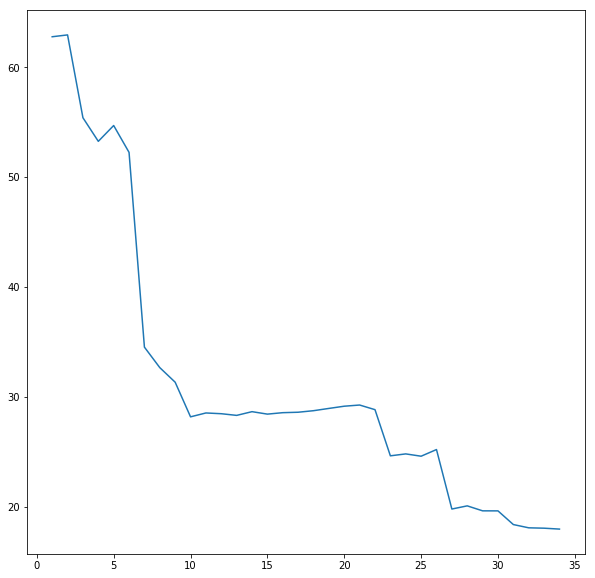

In [52]:
result_pc.columns = ['Components', 'Loss']
#print(result_pc)
plt.figure(figsize=(10,10))
plt.plot(result_pc['Components'],result_pc['Loss'] , linestyle='solid')


4.2 PCA on normalized data. Now let's normalize the data. 

1. Code such a function and apply this to all explanatory variables in your data (but not to the target).
This gives you a normalized data matrix X
2. Repeat the analysis in 4.1 with normalized data.

In [53]:
sam=df_bos[xcol]
sam1=df_bos[xcol]
print(sam)

j='CRIM'
for i in range(0,len(xcol)):
    stand1(xcol[i])

def stand1(j):
    var_mean=np.mean(sam[j])
    var_std=np.std(sam[j])
    x=0
    var1=np.empty(len(sam))
    for x in range(0,len(sam)):
        var1[x]=(sam.at[x,j] - var_mean)/var_std
    sam1[j]=var1 

print(sam1)

      CRIM     ZN  INDUS  CHAS   NOX    RM     AGE   DIS    RAD     TAX  \
0    0.006 18.000  2.310 0.000 0.538 6.575  65.200 4.090  1.000 296.000   
1    0.027  0.000  7.070 0.000 0.469 6.421  78.900 4.967  2.000 242.000   
2    0.027  0.000  7.070 0.000 0.469 7.185  61.100 4.967  2.000 242.000   
3    0.032  0.000  2.180 0.000 0.458 6.998  45.800 6.062  3.000 222.000   
4    0.069  0.000  2.180 0.000 0.458 7.147  54.200 6.062  3.000 222.000   
5    0.030  0.000  2.180 0.000 0.458 6.430  58.700 6.062  3.000 222.000   
6    0.088 12.500  7.870 0.000 0.524 6.012  66.600 5.561  5.000 311.000   
7    0.145 12.500  7.870 0.000 0.524 6.172  96.100 5.950  5.000 311.000   
8    0.211 12.500  7.870 0.000 0.524 5.631 100.000 6.082  5.000 311.000   
9    0.170 12.500  7.870 0.000 0.524 6.004  85.900 6.592  5.000 311.000   
10   0.225 12.500  7.870 0.000 0.524 6.377  94.300 6.347  5.000 311.000   
11   0.117 12.500  7.870 0.000 0.524 6.009  82.900 6.227  5.000 311.000   
12   0.094 12.500  7.870 

NameError: name 'stand1' is not defined

[0]
R square: -1.8752380298793814
Loss:
 62.84980100721312
[0, 1]
R square: -1.9518941420680764
Loss:
 62.84658862771007
[0, 1, 2]
R square: -0.8931538054886582
Loss:
 55.490964394381045
[0, 1, 2, 3]
R square: -0.7191990993367957
Loss:
 53.84819349648488
[0, 1, 2, 3, 4]
R square: -0.7106468841947599
Loss:
 54.40503978519704
[0, 1, 2, 3, 4, 5]
R square: -0.6320548465107614
Loss:
 51.82990804516938
[0, 1, 2, 3, 4, 5, 6]
R square: 0.3214002212107576
Loss:
 34.74007065459001
[0, 1, 2, 3, 4, 5, 6, 7]
R square: 0.3636503016019185
Loss:
 32.69009873304408
[0, 1, 2, 3, 4, 5, 6, 7, 8]
R square: 0.3979981297441443
Loss:
 31.663791893171066
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
R square: 0.46787310039115504
Loss:
 28.61475721142323
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
R square: 0.49816469162032934
Loss:
 28.53118538610169
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
R square: 0.47971521680564494
Loss:
 28.310719943570273
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
R square: 0.48014354483855665
Loss:
 28.27891298

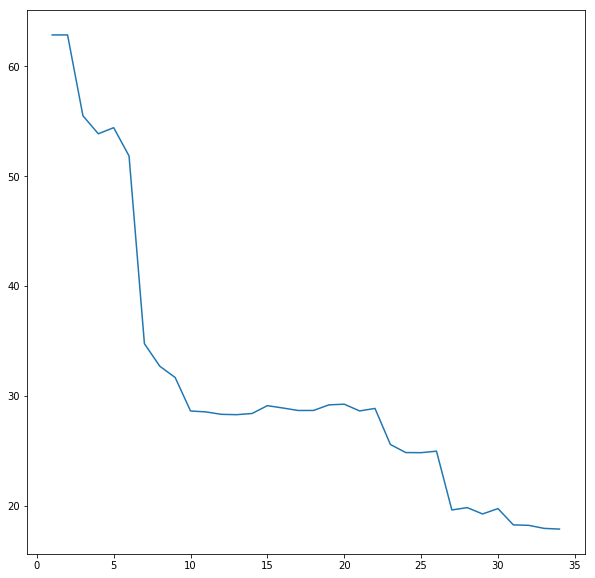

In [54]:
xcol=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',  'tax_filter', 'Nox_log', 'Age_filter', 'Crim_log', 'Rad_filter', 'Indus_sqrt', 'ZN_filter', 'Dis_log', 'pt_ratio_x', 'Lstat_x', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11']

X=sam1
dR = pd.DataFrame(PCA().fit_transform(X))

finalDf = pd.concat([dR, df_bos[['target']]], axis = 1)

f=list(dR)
result_pc=pd.DataFrame()
loss = np.empty(k)

c=0
g=1
for g in range(0,len(f)):
    xcol3[:]=[]
    c=g+1
    xcol3=f[0:c]
    k=10
    indices = np.arange(len(finalDf))
    np.random.shuffle(indices)
    loss = np.empty(k)
    rsquared=np.empty(k)
    print(xcol3)
    for i in range(k):
        itest = indices[i::k]
        itrain = list(set(indices).difference(itest))
        testDat = finalDf.iloc[itest]
        trainDat = finalDf.iloc[itrain]
        X=trainDat[xcol3]
        y=trainDat['target']
        lm = LinearRegression()
        model = lm.fit(X, y)
        X1 = testDat[xcol3]
        y1=lm.predict(X1)
        loss[i]=lossf(model,X1,testDat['target'])
        rsquared[i]= r2_score(y1, testDat['target'], sample_weight=None)
    print("R square:",np.mean(rsquared))
    print("Loss:\n",np.mean(loss))
   # print(len(xcol))
    result_pc.at[g,0]=c
    result_pc.at[g,1]=np.mean(loss)

result_pc.columns = ['Components', 'Loss']
plt.figure(figsize=(10,10))
plt.plot(result_pc['Components'],result_pc['Loss'] , linestyle='solid')


The plot with Normalized PCA shows better result interms of loss when compared to PCA.

4.3 What's the best solution?

Compare all your results: full model, forward selection, PCA on raw data, and PCA on normalized data.
Which one is most precise? Which one is most compact? Which one is the easiest to do? Which one
is the most straightforward to interpret?

1. Full model was the easiest to build, but it did have all irrelevant variables, which doesn't make sense in practical scenario . It was the most compact model.
2. Forward selection was the hardest to implement, but it had the best model with less # of variables. If we have a ready made function, it can be used as a guide for feature selection. It was easy to Interpret
3. PCA was easy to build and implement, but it is very hard to interpret the results.